In [61]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path ="../../../data/kc_house_data.csv"
df = pd.read_csv(path)

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.condition

0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 21597, dtype: int64

In [6]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.129599
floors           0.256804
waterfront       0.276295
lat              0.306692
bedrooms         0.308787
view             0.395734
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [7]:
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [8]:
df.grade

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 21597, dtype: int64

In [9]:
df.grade.max()

13

In [10]:
df.grade.min()

3

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [12]:
df['sqft_living'] = df['sqft_living'].astype(float)
df['bedrooms'] = df['bedrooms'].astype(float)
df['condition'] = df['condition'].astype(float)
df['grade'] = df['grade'].astype(float)
df['sqft_above'] = df['sqft_above'].astype(float)
df['yr_built'] = df['yr_built'].astype(float)
df['zipcode'] = df['zipcode'].astype(float)
df['sqft_living15'] = df['sqft_living15'].astype(float)
df['sqft_lot15'] = df['sqft_lot15'].astype(float)
df['sqft_lot'] = df['sqft_lot'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  float64
 11  grade          21597 non-null  float64
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  float64
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  float64
 17  lat            21597 non-null  float64
 18  long  

In [14]:
df['zipcode']

0        98178.0
1        98125.0
2        98028.0
3        98136.0
4        98074.0
          ...   
21592    98103.0
21593    98146.0
21594    98144.0
21595    98027.0
21596    98144.0
Name: zipcode, Length: 21597, dtype: float64

In [15]:
df['zipcode'].sort_values(ascending=True)

8508     98001.0
17199    98001.0
2338     98001.0
8728     98001.0
19729    98001.0
          ...   
10822    98199.0
10897    98199.0
15491    98199.0
10957    98199.0
3110     98199.0
Name: zipcode, Length: 21597, dtype: float64

In [16]:
Counter(df["zipcode"])

Counter({98178.0: 262,
         98125.0: 409,
         98028.0: 283,
         98136.0: 263,
         98074.0: 441,
         98053.0: 403,
         98003.0: 280,
         98198.0: 280,
         98146.0: 288,
         98038.0: 589,
         98007.0: 141,
         98115.0: 583,
         98107.0: 266,
         98126.0: 354,
         98019.0: 190,
         98103.0: 602,
         98002.0: 199,
         98133.0: 493,
         98040.0: 282,
         98092.0: 351,
         98030.0: 256,
         98119.0: 184,
         98112.0: 269,
         98052.0: 574,
         98027.0: 412,
         98117.0: 553,
         98058.0: 455,
         98001.0: 361,
         98056.0: 406,
         98166.0: 254,
         98023.0: 499,
         98070.0: 117,
         98148.0: 57,
         98105.0: 229,
         98042.0: 547,
         98008.0: 283,
         98059.0: 468,
         98122.0: 290,
         98144.0: 343,
         98004.0: 317,
         98005.0: 168,
         98034.0: 545,
         98075.0: 359,
         981

In [17]:
#the number of zip codes in king city
print(df['zipcode'].nunique())

70


In [18]:
df['zipcode'].describe()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [19]:
#zip_code = pd.get_dummies(df['zipcode'])


In [20]:
#data = pd.concat([df, zip_code], axis=1)
#data.head()

In [21]:
zip_code = df[['zipcode']]
onehot = OneHotEncoder(sparse=False)
onehot_data = onehot.fit_transform(zip_code)
print("Categorical data encoded into integer values....\n")
print(onehot_data)
zip_code = pd.DataFrame(onehot_data, columns=onehot.get_feature_names())

Categorical data encoded into integer values....

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
df = pd.concat([df,zip_code],axis=1)

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,x0_98146.0,x0_98148.0,x0_98155.0,x0_98166.0,x0_98168.0,x0_98177.0,x0_98178.0,x0_98188.0,x0_98198.0,x0_98199.0
0,7129300520,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,6600060120,2/23/2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,1523300141,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,291310100,1/16/2015,400000.0,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
len(onehot_data[1])

70

In [24]:
#onehot_data[1]

In [25]:
#dropped Null Values from the updated zip code dataframe

df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,x0_98146.0,x0_98148.0,x0_98155.0,x0_98166.0,x0_98168.0,x0_98177.0,x0_98178.0,x0_98188.0,x0_98198.0,x0_98199.0
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7237550310,5/12/2014,1230000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1321400060,6/27/2014,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3.0,2.50,1310.0,1294.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21592,263000018,5/21/2014,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,6600060120,2/23/2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,1523300141,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#dropped colums we are not looking at

df.drop(["waterfront", "yr_renovated", "view", "lat", "date", "id"], axis=1, inplace=True)

df.dropna(inplace=True)

In [27]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,x0_98146.0,x0_98148.0,x0_98155.0,x0_98166.0,x0_98168.0,x0_98177.0,x0_98178.0,x0_98188.0,x0_98198.0,x0_98199.0
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,7.0,1180.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,3.0,7.0,2170.0,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,6.0,770.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,5.0,7.0,1050.0,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,8.0,1680.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3.0,2.50,1530.0,1131.0,3.0,3.0,8.0,1530.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,4.0,2.50,2310.0,5813.0,2.0,3.0,8.0,2310.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,2.0,0.75,1020.0,1350.0,2.0,3.0,7.0,1020.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,3.0,2.50,1600.0,2388.0,2.0,3.0,8.0,1600.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   condition      21597 non-null  float64
 7   grade          21597 non-null  float64
 8   sqft_above     21597 non-null  float64
 9   sqft_basement  21597 non-null  object 
 10  yr_built       21597 non-null  float64
 11  zipcode        21597 non-null  float64
 12  long           21597 non-null  float64
 13  sqft_living15  21597 non-null  float64
 14  sqft_lot15     21597 non-null  float64
 15  x0_98001.0     21597 non-null  float64
 16  x0_98002.0     21597 non-null  float64
 17  x0_98003.0     21597 non-null  float64
 18  x0_980

In [29]:
from scipy.stats import zscore
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [30]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,x0_98146.0,x0_98148.0,x0_98155.0,x0_98166.0,x0_98168.0,x0_98177.0,x0_98178.0,x0_98188.0,x0_98198.0,x0_98199.0
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,7.0,1180.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,3.0,7.0,2170.0,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,6.0,770.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,5.0,7.0,1050.0,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,8.0,1680.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3.0,2.50,1530.0,1131.0,3.0,3.0,8.0,1530.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,4.0,2.50,2310.0,5813.0,2.0,3.0,8.0,2310.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,2.0,0.75,1020.0,1350.0,2.0,3.0,7.0,1020.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,3.0,2.50,1600.0,2388.0,2.0,3.0,8.0,1600.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#removing outliers from the dataframe
        #outliers are essentially more than 3 std dev from the mean of the data

z_scores = stats.zscore(df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_living15','sqft_lot15','price']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]
print(df)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0       3.0       1.00       1180.0    5650.0     1.0   
1      538000.0       3.0       2.25       2570.0    7242.0     2.0   
2      180000.0       2.0       1.00        770.0   10000.0     1.0   
3      604000.0       4.0       3.00       1960.0    5000.0     1.0   
4      510000.0       3.0       2.00       1680.0    8080.0     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0       3.0       2.50       1530.0    1131.0     3.0   
21593  400000.0       4.0       2.50       2310.0    5813.0     2.0   
21594  402101.0       2.0       0.75       1020.0    1350.0     2.0   
21595  400000.0       3.0       2.50       1600.0    2388.0     2.0   
21596  325000.0       2.0       0.75       1020.0    1076.0     2.0   

       condition  grade  sqft_above sqft_basement  ...  x0_98146.0  \
0            3.0    7.0      1180.0           0.0  ...         0.0   
1      

In [39]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,x0_98146.0,x0_98148.0,x0_98155.0,x0_98166.0,x0_98168.0,x0_98177.0,x0_98178.0,x0_98188.0,x0_98198.0,x0_98199.0
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,7.0,1180.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,3.0,7.0,2170.0,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,6.0,770.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,5.0,7.0,1050.0,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,8.0,1680.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3.0,2.50,1530.0,1131.0,3.0,3.0,8.0,1530.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,4.0,2.50,2310.0,5813.0,2.0,3.0,8.0,2310.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,2.0,0.75,1020.0,1350.0,2.0,3.0,7.0,1020.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,3.0,2.50,1600.0,2388.0,2.0,3.0,8.0,1600.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([  27.,   92.,  389., 1607., 3367., 4267., 4236., 3051., 1443.,
         459.]),
 array([11.26446411, 11.5517771 , 11.8390901 , 12.12640309, 12.41371609,
        12.70102908, 12.98834208, 13.27565507, 13.56296807, 13.85028106,
        14.13759406]),
 <BarContainer object of 10 artists>)

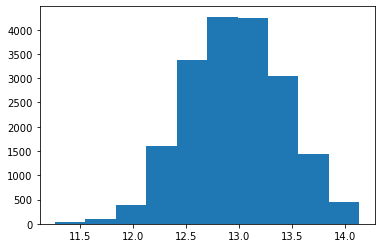

In [51]:
#log was the best scaler that made a normal distribution

plt.hist(np.log(df.price))

In [48]:
#if output less than -1 or greater than 1, the data are highly skewed.

np.log(df.price).skew()

-0.040676346027549784

In [49]:
np.sqrt(df.price).skew()

0.5390815738206999

In [50]:
np.cbrt(df.price).skew()

0.34815065894487923

In [59]:
columns = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_living15','sqft_lot15','price']]

In [68]:
df["sqft_living&grade"] = df["sqft_living"] * df["grade"]

<ipython-input-68-2b7074e9d4bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sqft_living&grade"] = df["sqft_living"] * df["grade"]


In [69]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,x0_98148.0,x0_98155.0,x0_98166.0,x0_98168.0,x0_98177.0,x0_98178.0,x0_98188.0,x0_98198.0,x0_98199.0,sqft_living&grade
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,7.0,1180.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8260.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,3.0,7.0,2170.0,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17990.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,6.0,770.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4620.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,5.0,7.0,1050.0,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13720.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,8.0,1680.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3.0,2.50,1530.0,1131.0,3.0,3.0,8.0,1530.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12240.0
21593,400000.0,4.0,2.50,2310.0,5813.0,2.0,3.0,8.0,2310.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18480.0
21594,402101.0,2.0,0.75,1020.0,1350.0,2.0,3.0,7.0,1020.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7140.0
21595,400000.0,3.0,2.50,1600.0,2388.0,2.0,3.0,8.0,1600.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12800.0


dependant variable = price 


independant = grade, square foot living and then looking at grade and square foot living combining 

<AxesSubplot:xlabel='sqft_living&grade', ylabel='price'>

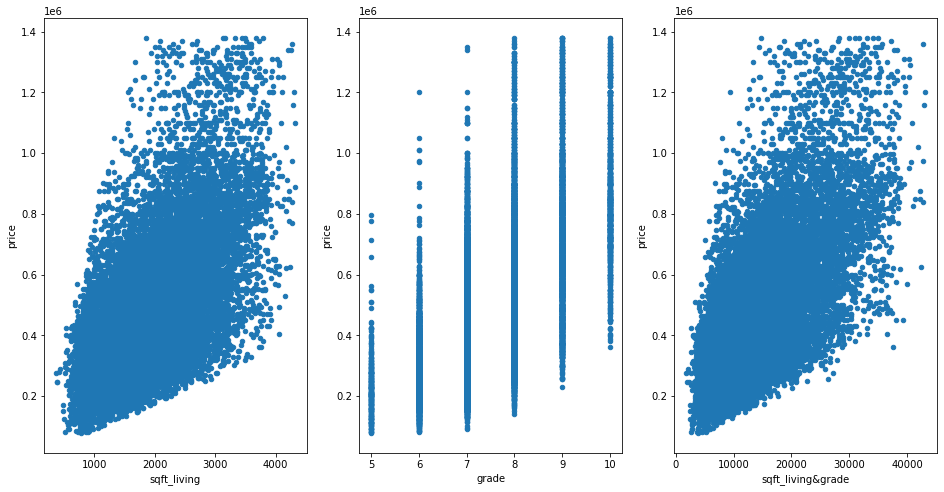

In [71]:
fig, axs = plt.subplots(1,3)
df.plot(kind='scatter', x='sqft_living', y='price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='grade', y='price', ax=axs[1])
df.plot(kind='scatter', x='sqft_living&grade', y='price', ax=axs[2])

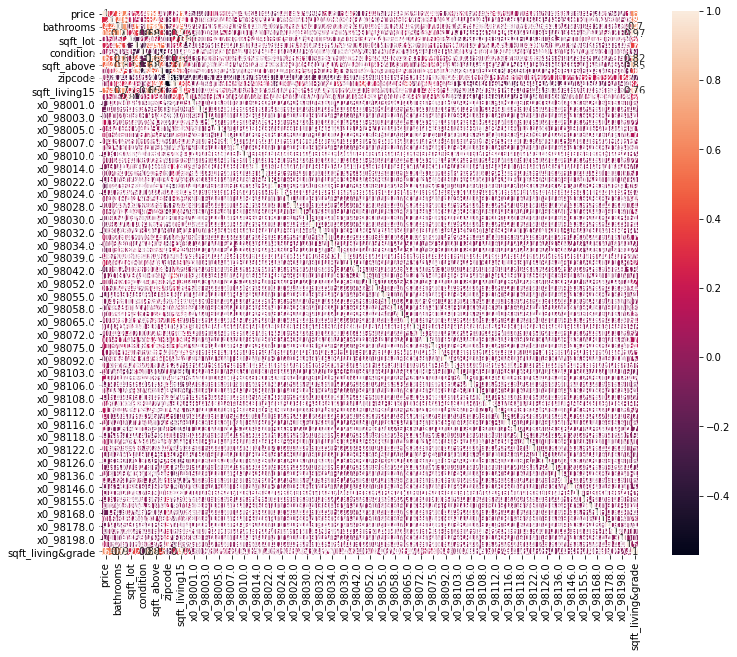

In [76]:
plt.figure(figsize=(12,10))

ax = sns.heatmap(df.corr(), annot=True);

In [83]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
imp_coef = df.sort_values(by='price', ascending=True)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("houses")

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# input and output features
X = df.drop("price", axis= 1)
y = df["price"]

# defining model to build
lin_reg = LinearRegression()

# create the RFE model and select 6 attributes
rfe = RFE(lin_reg, 6)
rfe.fit(X, y)

# summarize the selection of the attributes
print(f"Number of selected features: {rfe.n_features_}\n\
Mask: {rfe.support_}\n\
Selected Features:", [feature for feature, rank in zip(X.columns.values, rfe.ranking_) if rank==1],"\n\
Estimator : {rfe.estimator_}")